# Importando Bibliotecas Necessárias

In [1]:
import snscrape.modules.twitter as sntwitter # Realização do Scraping dos Tweets
import pandas as pd # Manipulação de dados
from tqdm import tqdm # Monitoramento de tempo de execução de loops
import re # Operações com Expressões Regulares (string)
import emoji # Transformação de emojis em string (descrição do emoji)

from nltk.corpus import stopwords # Palavras a serem desconsideradas da análise
from nltk.tokenize import word_tokenize # Vetorização de sentenças
import string # Pontuações

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok # Desvetorização de sentenças
import matplotlib.pyplot as plt # Visualização de gráficos
from sklearn.feature_extraction.text import CountVectorizer # Contagem de "palavras" numa sentença
from wordcloud import WordCloud

# Necessário execução apenas uma única vez (caso não tenha sido baixado anteriormente)
import nltk
nltk.download('stopwords') # Baixando stopwords
nltk.download('punkt') # Baixando tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DE0186613\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DE0186613\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Scraping de Tweets (raspagem de dados)

- Para realização do scraping dos tweets de ambos os candidatos, iremos utilizar a biblioteca snscrape. Segue repositório com maior detalhamento: https://github.com/JustAnotherArchivist/snscrape
- No geral, iremos apenas utilizar a função Twitter Search Scraper. Onde precisamos apenas passar parâmetros de acordo com nosso interesse. No nosso caso, iremos especificar um perfil específico no Twitter e especificaremos também um intervalo de tempo onde o scraper irá retornar todos os tweets, datas, username e url do perfil solicitado dentro do intervalo de tempo especificado.

In [2]:
maxTweets = 1000000000 # Controle de tweets que será retornado...
                       # Setado em um número muito alto pois o objetivo é retornar todos os tweets.
i = 0
tweets_list_lula = []
# Iteração para scraping dos tweets
for tweet in tqdm(sntwitter.TwitterSearchScraper('from:lulaoficial since:2022-08-16 until:2022-10-31').get_items()):
  if i > maxTweets:
    break
  tweets_list_lula.append([tweet.date, tweet.url, tweet.username, tweet.content])
  i = i + 1

0it [00:00, ?it/s]<ipython-input-2-08bde0081102>:9: FutureWarning: username is deprecated, use user.username instead
  tweets_list_lula.append([tweet.date, tweet.url, tweet.username, tweet.content])
<ipython-input-2-08bde0081102>:9: FutureWarning: content is deprecated, use rawContent instead
  tweets_list_lula.append([tweet.date, tweet.url, tweet.username, tweet.content])
1933it [00:58, 33.16it/s]


In [3]:
maxTweets = 1000000000 # Controle de tweets que será retornado...
                       # Setado em um número muito alto pois o objetivo é retornar todos os tweets.
i = 0
tweets_list_bolsonaro = []
# Iteração para scraping dos tweets
for tweet in tqdm(sntwitter.TwitterSearchScraper('from:jairbolsonaro since:2022-08-16 until:2022-10-31').get_items()):
  if i > maxTweets:
    break
  tweets_list_bolsonaro.append([tweet.date, tweet.url, tweet.username, tweet.content])
  i = i + 1

0it [00:00, ?it/s]<ipython-input-3-f8430d41d48c>:9: FutureWarning: username is deprecated, use user.username instead
  tweets_list_bolsonaro.append([tweet.date, tweet.url, tweet.username, tweet.content])
<ipython-input-3-f8430d41d48c>:9: FutureWarning: content is deprecated, use rawContent instead
  tweets_list_bolsonaro.append([tweet.date, tweet.url, tweet.username, tweet.content])
672it [00:18, 35.70it/s]


In [4]:
# Adicionando os dados em DataFrames
tweets_lula = pd.DataFrame(tweets_list_lula, columns=['date', 'url','username', 'content' ])
tweets_bolsonaro = pd.DataFrame(tweets_list_bolsonaro, columns=['date', 'url','username', 'content' ])

In [32]:
# Salvando csvs
tweets_lula.to_csv('tweets_lula.csv',index=False)
tweets_bolsonaro.to_csv('tweets_bolsonaro.csv',index=False)

In [6]:
# Dimensão dos DataFrames
tweets_lula.shape, tweets_bolsonaro.shape

((1933, 4), (672, 4))

# Pré-Processamento do Texto

In [7]:
# Carregando as StopWords em Português
stop_words = set(stopwords.words('portuguese'))

In [8]:
# Transformando emojis em suas descrições
tweets_lula['content'] = tweets_lula['content'].apply(lambda x: emoji.demojize(x))
# Eliminação de Links
tweets_lula['content'] = tweets_lula['content'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x))
# Vetorização para eliminação de pontuações
tweets_lula['content_tokenized'] = tweets_lula['content'].apply(lambda x: word_tokenize(x.lower()))

In [9]:
# Transformando emojis em suas descrições
tweets_bolsonaro['content'] = tweets_bolsonaro['content'].apply(lambda x: emoji.demojize(x))
# Eliminação de Links
tweets_bolsonaro['content'] = tweets_bolsonaro['content'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", x))
# Vetorização para eliminação de pontuações
tweets_bolsonaro['content_tokenized'] = tweets_bolsonaro['content'].apply(lambda x: word_tokenize(x.lower()))

In [10]:
# Adicionando as pontuações em uma lista
pontuacao = []
for i in string.punctuation:
    pontuacao.append(i)

In [11]:
# Eliminando stopwords e pontuações dos tweets
tweets_aux1 = []
for i in tweets_lula['content_tokenized']:
    tweets_aux2 = []
    for j in i:
        if (j not in stop_words) and (j not in pontuacao):
            tweets_aux2.append(j)
    tweets_aux1.append(tweets_aux2)

In [12]:
# Eliminando stopwords e pontuações dos tweets
tweets_aux3 = []
for i in tweets_bolsonaro['content_tokenized']:
    tweets_aux4 = []
    for j in i:
        if (j not in stop_words) and (j not in pontuacao):
            tweets_aux4.append(j)
    tweets_aux3.append(tweets_aux4)

In [13]:
# Criando nova coluna no DataFrame com os tweets pré-processados, mas ainda vetorizados
tweets_lula['tweets_aux1'] = tweets_aux1
tweets_bolsonaro['tweets_aux3'] = tweets_aux3

In [14]:
# Desvetorização dos tweets para geração das WordClouds utilizando a bilbioteca WordCloud
detokenizer = Detok()
tweets_lula['tweets_aux1'] = tweets_lula['tweets_aux1'].apply(lambda x: detokenizer.detokenize(x))
tweets_bolsonaro['tweets_aux3'] = tweets_bolsonaro['tweets_aux3'].apply(lambda x: detokenizer.detokenize(x))

# Criação das WordClouds

### Primeiro Método:
- Utilizando todos os tweets com as palavras tendo siginificados independentes

In [15]:
# Passando todos os tweets como um grande texto para geração das WordClouds
wordcloud_lula = WordCloud().generate(tweets_lula['tweets_aux1'].values.sum())
wordcloud_bolsonaro = WordCloud().generate(tweets_bolsonaro['tweets_aux3'].values.sum())

### WordCloud Lula - Primeiro Método

<IPython.core.display.Javascript object>


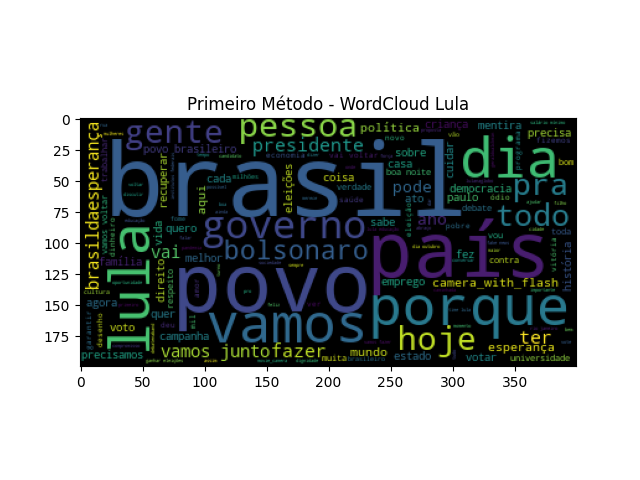

In [17]:
%matplotlib notebook
plt.title("Primeiro Método - WordCloud Lula")
plt.imshow(wordcloud_lula)

### WordCloud Bolsonaro - Primeiro Método

<IPython.core.display.Javascript object>


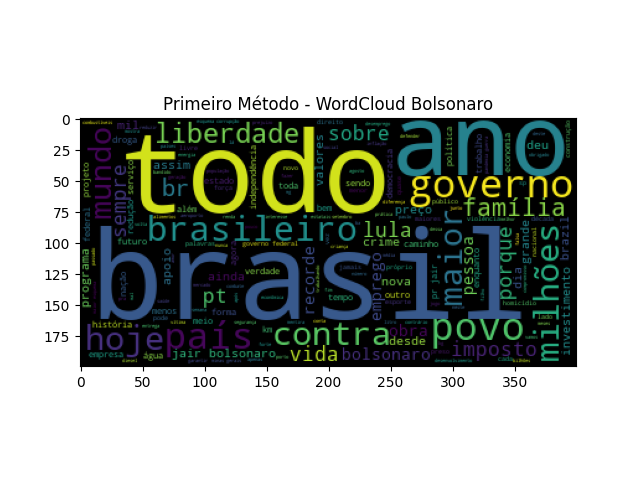

In [18]:
%matplotlib notebook
plt.title("Primeiro Método - WordCloud Bolsonaro")
plt.imshow(wordcloud_bolsonaro)

### Segundo Método: Usando N-Gram
- Iremos fazer N combinações entre as palavras e verificar se as combinações apresentam frequência relativamente alta para entrar na WordCloud.

In [19]:
# Definição das n combinações
n = 3
cv_lula = CountVectorizer(ngram_range=(1, n))
cv_bolsonaro = CountVectorizer(ngram_range=(1, n))

In [20]:
# Definindo o corpus onde será aplicado o CountVectorizer utilizando as n combinações
corpus_lula = tweets_lula['tweets_aux1'].values.sum()
corpus_bolsonaro = tweets_bolsonaro['tweets_aux3'].values.sum()

In [21]:
# Transformando os textos em Combinação vs Frequência apresentada no texto.
X_lula = cv_lula.fit_transform([corpus_lula])
X_lula = X_lula.toarray()

X_bolsonaro = cv_bolsonaro.fit_transform([corpus_bolsonaro])
X_bolsonaro = X_bolsonaro.toarray()

In [22]:
# Adicionando a um DataFrame
bag_of_words_LULA = pd.DataFrame(X_lula, columns = cv_lula.get_feature_names())
bag_of_words_BOLSONARO = pd.DataFrame(X_bolsonaro, columns = cv_bolsonaro.get_feature_names())

c:\users\de0186613\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\users\de0186613\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
bag_of_words_LULA

,00,00 camera_with_flash,00 camera_with_flash ricardostuckertsurpresa,00 horassabem,00 horassabem situação,01,01 09,01 09 faça,02,02 09,...,único grande vencedor,único ontem,único ontem bolsonaro,único ovo,único ovo outras,único país,único país g20,おやすみ,おやすみ governo,おやすみ governo governo
0,2,1,1,1,1,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,1


In [24]:
bag_of_words_BOLSONARO

,00,00 01,00 01 09,00 25,00 25 09,00 pr,00 pr jair,000,000 000,000 000 pessoas,...,único líder coragem,único partido,único partido ter,único presidenciavel,único presidenciavel atacando,únicos,únicos alma,únicos alma verdade,únicos capazes,únicos capazes dar
0,3,1,1,1,1,1,1,4,1,1,...,1,1,1,1,1,2,1,1,1,1


In [26]:
# Definindo dicionário com palavras e sua frequência com limite de palavra a serem analisadas
palavras_consideradas = 1000
lula_dict = bag_of_words_LULA.loc[0].sort_values(ascending=False)[:palavras_consideradas].to_dict()
bolsonaro_dict = bag_of_words_BOLSONARO.loc[0].sort_values(ascending=False)[:palavras_consideradas].to_dict()

<IPython.core.display.Javascript object>


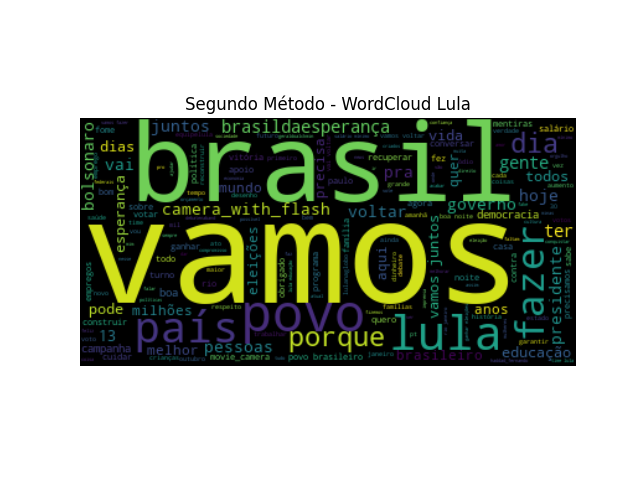

In [28]:
%matplotlib notebook
# Criando o objeto Wordcloud
wordcloud_lula = WordCloud(min_word_length =2,
                      background_color='black')

# Gerando a WordCloud a partir das frequências das palavras consideradas
wordcloud_lula.generate_from_frequencies(lula_dict)

# Plot
plt.title("Segundo Método - WordCloud Lula")
plt.imshow(wordcloud_lula, interpolation='bilinear')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


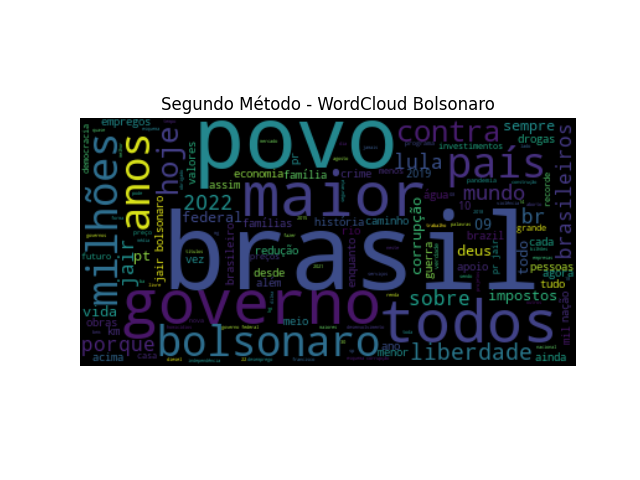

In [31]:
%matplotlib notebook
# Criando o objeto Wordcloud
wordcloud_bolsonaro = WordCloud(min_word_length =2,
                      background_color='black')

# Gerando a WordCloud a partir das frequências das palavras consideradas
wordcloud_bolsonaro.generate_from_frequencies(bolsonaro_dict)

# Plot
plt.title("Segundo Método - WordCloud Bolsonaro")
plt.imshow(wordcloud_bolsonaro, interpolation='bilinear')
plt.axis('off')
plt.show()

# Conclusão

- Foram aplicados dois diferentes métodos para criação de WordClouds, um considerando todas as palavras independentes e outro verificando se existe alguma relevância na frênquencia quando as mesmas são analisada em combinações.
- Na WordCloud do Lula, considerando o segundo método, nós conseguimos notar as combinações "vamos juntos" e "povo brasileiro" com frequências relativamente altas para aparecerem na WordCloud.
- Já na WordCloud do Bolsonaro, também considerando o segundo método, notamos a relevância da combinação "jair bolsonaro" e "governo federal".
- Mas, no geral, ambos os métodos conseguem expressar as palavras mais utilizadas na comunicação dos antigos candidatos à presidência do Brasil em seus perfis oficiais no Twitter no período eleitoral de 2022.